## High Level Computer Vision 
### Exercise 2: Convolutional Neural Networks

**You may wirte your report in this `ipynb` file or submit the report as a PDF file.**

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In Exercise 3, you will implement a convolutional neural network to perform image classification and explore methods to improve the training performance and generalization of these networks.
We will use the CIFAR-10 dataset as a benchmark for our networks, similar to the previous exercise. This dataset consists of 50000 training images of 32x32 resolution with 10 object classes, namely airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. The task is to implement a convolutional network to classify these images using the PyTorch library. The four questions are,

- Implementing a convolutional neural network, training it, and visualizing its weights(Question 1).
- Experiment with batch normalization and early stopping (Question 2).
- Data augmentation and dropout to improve generalization (Question 3).
- Implement transfer learning from an ImageNet-pretrained model (Question 4).

### Question 1: Implement Convolutional Network (10 points)

In this question, we will implement a five-layered convolutional neural network architecture as well as the loss function to train it. Refer to the comments in the code to the exact places where you need to fill in the code.

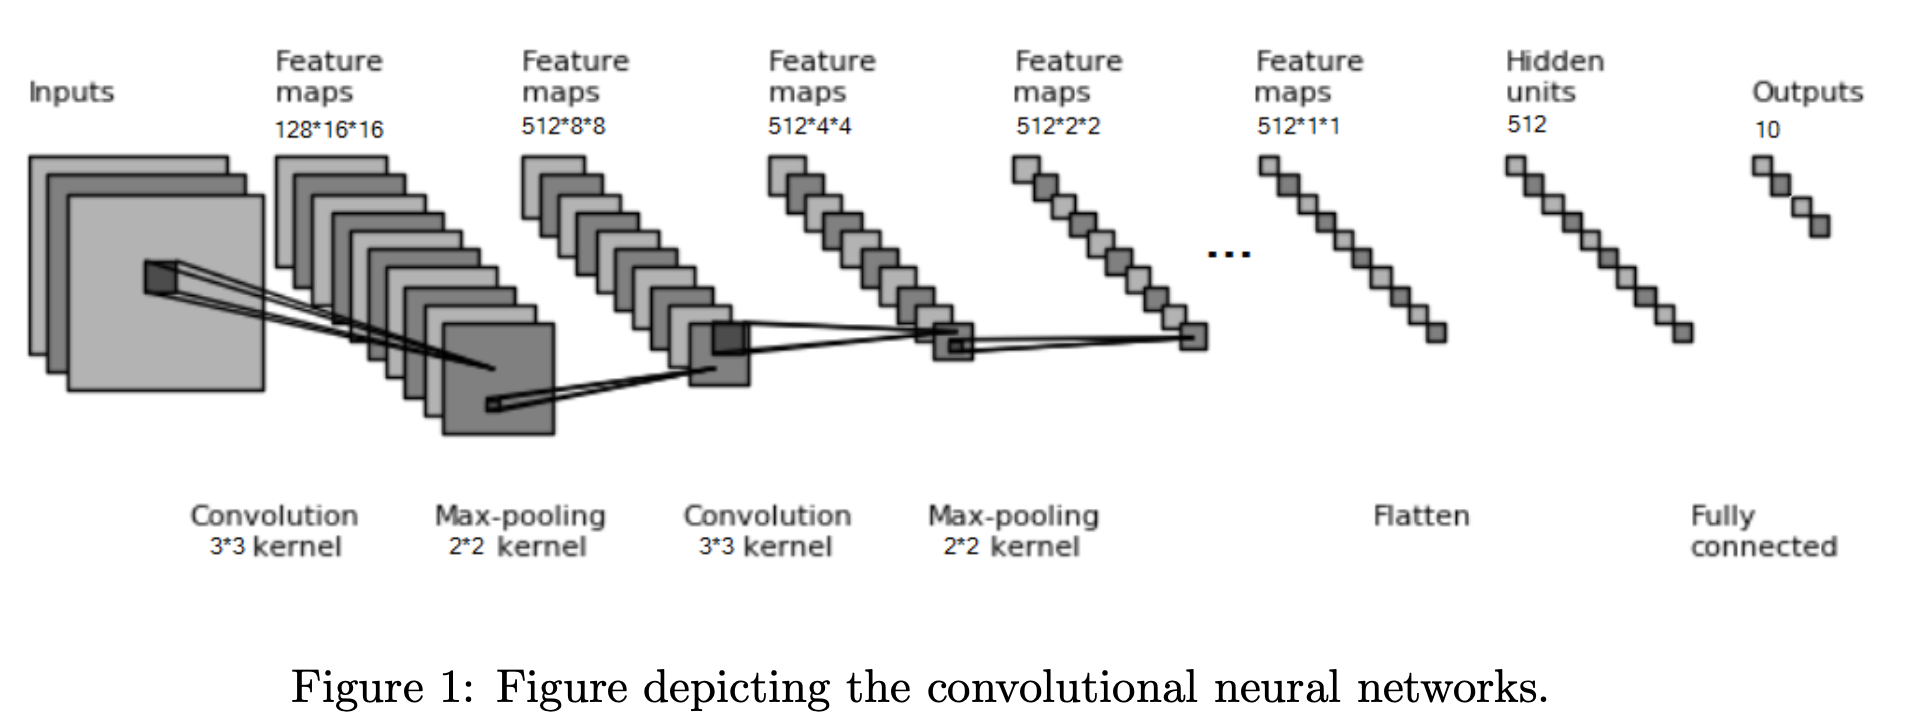

a) Our architecture is shown in Fig 1. It has five convolution blocks. Each block is consist of convolution, max pooling, and ReLU operation in that order. We will use 3×3 kernels in all convolutional layers. Set the padding and stride of the convolutional layers so that they maintain the spatial dimensions. Max pooling operations are done with 2×2 kernels, with a stride of 2, thereby halving the spatial resolution each time. Finally, stacking these five blocks leads to a 512 × 1 × 1 feature map. Classification is achieved by a fully connected layer. We will train convolutional neural networks on the CIFAR-10 dataset. Implement a class ConvNet to define the model described. The ConvNet takes 32 × 32 color images as inputs and has 5 hidden layers with 128, 512, 512, 512, 512 filters, and produces a 10-class classification. The code to train the model is already provided. Train the above model and report the training and validation accuracies. (5 points)

b) Implement a function `PrintModelSize`, which calculates and prints the number of parameters of a neural network. `PrintModelSize` takes a model as input and returns the parameters of a model. This gives us a measure of model capacity. Report the number of parameters for the described model. (2 points)

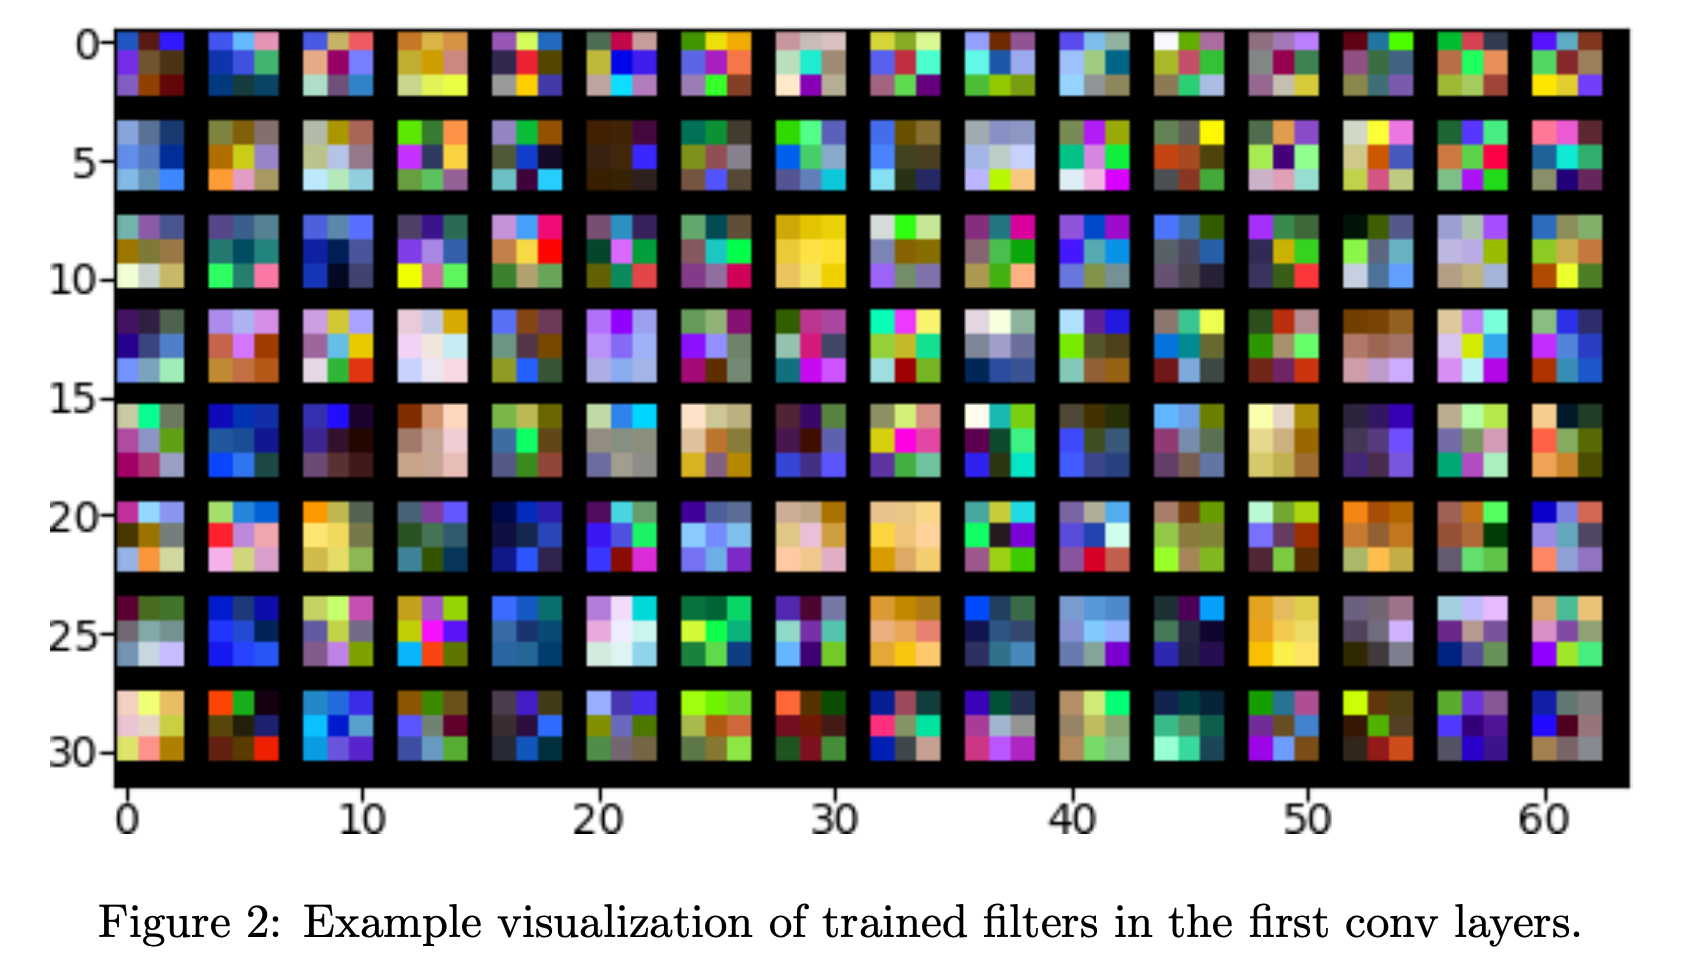

c) Implement a function `VisualizeFilter`, which visualizes the filters of the first convolution layer implemented in Q1.a. In other words, you need to show 128 filters with size 3x3 as color images (since each filter has three input channels). Stack these into 3x3 color images into one large image. You can use the `imshow` function from the `matplotlib` library to visualize the weights. See an example in Fig. 2 Compare the filters before and after training. Do you see any patterns? (3 points)

#### Wirte your report for Q1 in this cell.
c) The filters before training are randomly assigned valued filters. Therefore, when we visualized it, there is no certain patterns. On the other hand, the filters after training have some patterns that can be recognized. For example, the filter with right black pixles and left white pixels detect the gradient difference from left to right. Similarly, the filter with top light blue pixels and the bottom dark blue pixels detect blue gradient difference from top to bottom on the image. Moreover, some filters with one color help to get the divided channel of image with specific color. With these filters, model can get feature maps from each image to understand what the object is in the image.

### Question 2: Improve training of Convolutional Networks (10 points)

a) Batch normalization is a widely used operation in neural networks, which will increase the speed of convergence and reach higher performance. Read the paper “Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift” for more theoretical details.
In practice, these operations are implemented in the most popular toolbox, such as PyTorch and TensorFlow. Add batch normalization in the model of Q1.a. Please keep other hyperparameters the same, but only add batch normalization. The ConvNet with batch normalization still uses the same class with Q1.a but different arguments. Check the code for details. In each block, the computations are in the order of convolution, batch normalization, pooling, and ReLU. Compare the loss curves and accuracy using batch normalization to its counterpart in Q1.a. (5 points)

b) Early stopping is a method to alleviate overfitting. Instead of reporting the performance of the final model, early stopping also saves the best model on the validation set during training. Increase the training epochs to 50 in Q1.a and Q2.a, and compare the best model and latest model on the training set. Due to the randomness, you can train multiple times to verify and observe overfitting and early stopping. (5 points)

#### Wirte your report for Q2 in this cell.

a) The results show that the model with the batch normalization derived slightly better classification performance, without batch normalization accuracy is 78.5% and with batch normalization accuracy is 82%. Also the loss curve shows that the batch normalization makes the loss to decrease more rapidly during the learning process.

b) The results show that the model from early stopping (best model) has higher test accuracy than the one with lastest model, since it helps to prevent overffiting to the train data, it can alleviate the test errors. Moreover, the early stopping with the batch normalization shows the highest test accuracy. Similar to the Q2.a result, the batch normalization accelarated the learning process and the loss curve is steeper than the one without the batch normalization. 

### Question 3: Improve generalization of Convolutional Networks (10 points)

We saw in Q2 that the model can start over-fitting to the training set if we continue training for long. To prevent over-fitting, there are two main paradigms we can focus on. The first is to get more training data. This might be a difficult and expensive process involving significant. However, it is generally the most effective way to learn more general models. A cheaper alternative is to perform data augmentation. The second approach is to regularize the model. In the following sub-questions, we will experiment with each of these paradigms and measure the effect on the model generalization.

a) Data augmentation is the process of creating more training data by applying certain transformations to the training set images. Usually, the underlying assumption is that the label of the image does not change under the applied transformations. This includes geometric transformations like translation, rotation, scaling, flipping, random cropping, and color transformations like greyscale, colorjitter. For every image in the training batch, a random transformation is sampled from the possible ones (e.g., a random number of pixels to translate the image by) and is applied to the image. While designing the data input pipeline, we must choose the hyper-parameters for these transformations (e.g., limits of translation or rotation) based on things we expect to see in the test-set/real world. Your task in this question is to implement the data augmentation for the CIFAR-10 classification task. Many of these transformations are implemented in the `torchvision.transforms` package. Familiarize your- self with the APIs of these transforms, and functions to compose multiple transforms or randomly sample them. Next, implement geometric and color space data augmentations for the CIFAR-10 dataset, by choosing the right functions and order of application. Tune the hyper-parameters of these data augmentations to improve the validation performance. You will need to train the model a bit longer (20-30 epochs) with data augmentation, as the training data is effectively larger now. Discuss which augmentations work well for you in the report. (6 points)

b) Dropout is a popular scheme to regularize the model to improve generalization. The dropout layer works by setting the input activations randomly to zero at the output. You can implement Dropout by adding the `torch.nn.Dropout` layer between the conv blocks in your model. The layer has a single hyper-parameter $p$, which is the probability of dropping the input activations. High values of $p$ regularize the model heavily and decrease model capacity, but with low values, the model might overfit. Find the right hyper-parameter for $p$ by training the model for different values of $p$ and comparing training validation and validation accuracies. You can use the same parameter $p$ for all layers. You can also disable the data augmentation from the previous step while running this experiment, to clearly see the benefit of dropout. Show the plot of training and validation accuracies for different values of dropout (0.1 - 0.9) in the report. (4 points)

#### Wirte your report for Q3 in this cell.

a) We tried data augmentation with random rotation and horizontal/vertical flip. Initially we expected that the data augmentation with rotation and flips would help the robustness of algorithm as diverse directions of the images are used for training. However, the accuracy is significantly lower with 57.1%. This result shows that we need to carefully choose right data augmentation with considering the purpose and type of task.

b) We tried dropout with the value of probability 0.2, 0.5 and 0.8. The highest test accuracy is 78.8% with 0.2, it also gives the highest validation accuracy 79.9%. It was also slightly better than the test accuracy of base model. This implies that dropping relatively less percentage of input data for each convolution layers help avoiding overfitting. In addition, we assumed that dropping the higher percentage(0.8) of input data could disturb improving the training process. However, the test accuracy showed 77.3%, which performed better than our expectation.

In [59]:
def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.backends.mps.is_available(): #apple silicon, used in pytorch nightly build
    device = torch.device("mps")
print('Using device: %s'%device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512, 512]
num_epochs = 20
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
norm_layer = None
print(hidden_size)
data_augmentation = False

#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
#################################################################################
# TODO: Q3.a Chose the right data augmentation transforms with the right        #
# hyper-parameters and put them in the data_aug_transforms variable             #
#################################################################################
data_aug_transforms = []
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
if data_augmentation ==True:
    data_aug_transforms = [transforms.RandomRotation((-180, 180)),
                        transforms.RandomHorizontalFlip(p=0.5),
                        transforms.RandomVerticalFlip(p=0.5)]
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=test_transform
                                          )
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Using device: mps
[128, 512, 512, 512, 512, 512]
Files already downloaded and verified


In [43]:
#-------------------------------------------------
# Convolutional neural network (Q1.a and Q2.a)
# Set norm_layer for different networks whether using batch normalization
#-------------------------------------------------
from pyparsing import stringEnd
from torch import dropout


class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, norm_layer=None, dropout=False, dropout_val = None):
        super(ConvNet, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the convolutional layer    #
        # described in the exercise.                                                    #
        # For Q1.a make use of conv2d and relu layers from the torch.nn module.         #
        # For Q2.a make use of BatchNorm2d layer from the torch.nn module.              #
        # For Q3.b Use Dropout layer from the torch.nn module.                          #
        #################################################################################
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        #if norm_layer == None and dropout==False:
        layers.append(nn.Conv2d(input_size, hidden_size[0],kernel_size=3, padding=1, stride=1))
        if norm_layer!=None:
            layers.append(nn.BatchNorm2d(hidden_size[0]))
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.ReLU())
        if dropout == True:
            layers.append(nn.Dropout(dropout_val))

        layers.append(nn.Conv2d(hidden_size[0], hidden_size[1], kernel_size=3, padding=1, stride=1))
        if norm_layer!=None:
            layers.append(nn.BatchNorm2d(hidden_size[1]))
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.ReLU())
        if dropout == True:
            layers.append(nn.Dropout(dropout_val))

        layers.append(nn.Conv2d(hidden_size[1], hidden_size[2], kernel_size=3, padding=1, stride=1))
        if norm_layer!=None:
            layers.append(nn.BatchNorm2d(hidden_size[2]))
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.ReLU())
        if dropout == True:
            layers.append(nn.Dropout(dropout_val))

        layers.append(nn.Conv2d(hidden_size[2],hidden_size[3],kernel_size=3,padding=1, stride=1))
        if norm_layer!=None:
            layers.append(nn.BatchNorm2d(hidden_size[3]))
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.ReLU())
        if dropout == True:
            layers.append(nn.Dropout(dropout_val))

        layers.append(nn.Conv2d(hidden_size[3],hidden_size[4], kernel_size=3, padding=1, stride=1))
        if norm_layer!=None:
            layers.append(nn.BatchNorm2d(hidden_size[4]))
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.ReLU())
        if dropout == True:
            layers.append(nn.Dropout(dropout_val))

        self.fc = nn.Linear(hidden_size[4], num_classes)
        self.layers = nn.Sequential(*layers)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        x = nn.Flatten(1,-1)(self.layers(x)) #200*512*1*1
        out = self.fc(x)#200*512
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [5]:
#-------------------------------------------------
# Calculate the model size (Q1.b)
# if disp is true, print the model parameters, otherwise, only return the number of parameters.
#-------------------------------------------------
def PrintModelSize(model, disp=True):
    #################################################################################
    # TODO: Implement the function to count the number of trainable parameters in   #
    # the input model. This useful to track the capacity of the model you are       #
    # training                                                                      #
    #################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    model_sz = sum(p.numel() for p in model.parameters() if p.requires_grad)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return model_sz

In [6]:
#-------------------------------------------------
# Calculate the model size (Q1.c)
# visualize the convolution filters of the first convolution layer of the input model
#-------------------------------------------------
def VisualizeFilter(model):
    #################################################################################
    # TODO: Implement the functiont to visualize the weights in the first conv layer#
    # in the model. Visualize them as a single image fo stacked filters.            #
    # You can use matlplotlib.imshow to visualize an image in python                #
    #################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
    fig = plt.figure()
    for i, filter in enumerate(model.layers[0].weight.cpu().data.numpy()):
        plt.subplot(8,16, i+1)
        plt.imshow((filter*255).astype(np.uint8))
        plt.xticks([])
        plt.yticks([])
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [7]:
#======================================================================================
# Q1.a: Implementing convolutional neural net in PyTorch
#======================================================================================
# In this question we will implement a convolutional neural networks using the PyTorch
# library.  Please complete the code for the ConvNet class evaluating the model
#--------------------------------------------------------------------------------------
model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)
# Q2.a - Initialize the model with correct batch norm layer

model.apply(weights_init)
# Print the model
print(model)

ConvNet(
  (fc): Linear(in_features=512, out_features=10, bias=True)
  (layers): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU()
    (9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU()
  )
)


In [8]:
# Print model size
#======================================================================================
# Q1.b: Implementing the function to count the number of trainable parameters in the model
#======================================================================================
PrintModelSize(model)

7678474

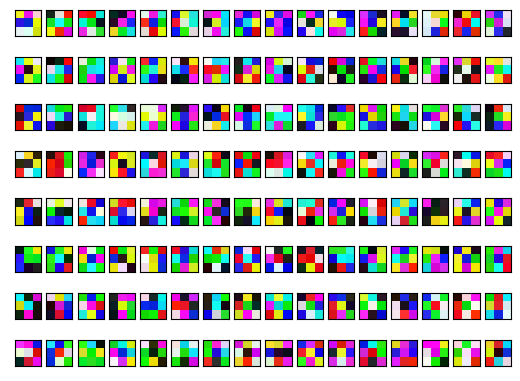

In [9]:
#======================================================================================
# Q1.c: Implementing the function to visualize the filters in the first conv layers.
# Visualize the filters before training
#======================================================================================
VisualizeFilter(model)

In [10]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
best_acc = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Validataion accuracy is: {} %'.format(100 * correct / total))
        #################################################################################
        # TODO: Q2.b Implement the early stopping mechanism to save the model which has #
        # acheieved the best validation accuracy so-far.                                #
        #################################################################################
        best_model = None
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        val_acc = correct/total*100
        if val_acc > best_acc:
            best_acc = val_acc
            best_model = model
            torch.save(best_model.state_dict(),'./best.ckpt')
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    model.train()

Epoch [1/20], Step [100/245], Loss: 1.7797
Epoch [1/20], Step [200/245], Loss: 1.4916
Validataion accuracy is: 52.7 %
Epoch [2/20], Step [100/245], Loss: 1.3892
Epoch [2/20], Step [200/245], Loss: 1.1833
Validataion accuracy is: 62.2 %
Epoch [3/20], Step [100/245], Loss: 1.0985
Epoch [3/20], Step [200/245], Loss: 0.9480
Validataion accuracy is: 66.7 %
Epoch [4/20], Step [100/245], Loss: 0.8463
Epoch [4/20], Step [200/245], Loss: 0.9689
Validataion accuracy is: 71.2 %
Epoch [5/20], Step [100/245], Loss: 0.6747
Epoch [5/20], Step [200/245], Loss: 0.8540
Validataion accuracy is: 73.7 %
Epoch [6/20], Step [100/245], Loss: 0.6048
Epoch [6/20], Step [200/245], Loss: 0.7024
Validataion accuracy is: 76.8 %
Epoch [7/20], Step [100/245], Loss: 0.5083
Epoch [7/20], Step [200/245], Loss: 0.5664
Validataion accuracy is: 75.0 %
Epoch [8/20], Step [100/245], Loss: 0.5467
Epoch [8/20], Step [200/245], Loss: 0.6058
Validataion accuracy is: 78.8 %
Epoch [9/20], Step [100/245], Loss: 0.4957
Epoch [9/20],

Accuracy of the network on the 1000 test images: 78.5 %


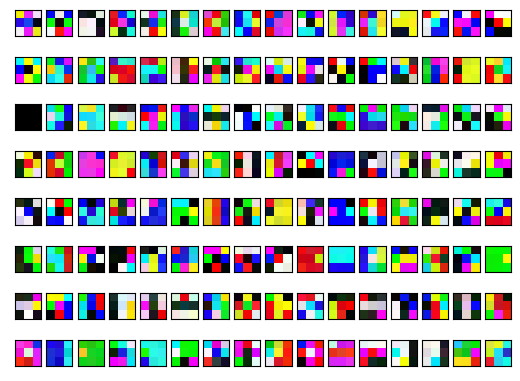

In [11]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
model.eval()
#################################################################################
# TODO: Q2.b Implement the early stopping mechanism to load the weights from the#
# best model so far and perform testing with this model.                        #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
model.load_state_dict(torch.load('./best.ckpt'))
model.eval()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

# Q1.c: Implementing the function to visualize the filters in the first conv layers.
# Visualize the filters before training
VisualizeFilter(model)
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [70]:
##################
#define function runs train and test
def model_train_test(model, model_name, earlystopping = False):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

    # Train the model
    lr = learning_rate
    best_acc = 0
    acc_list=[]
    loss_list=[]
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # Move tensors to the configured device
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)

            loss = criterion(outputs, labels)
            loss_list.append(loss.cpu().data.numpy())
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Code to update the lr
        lr *= learning_rate_decay
        update_lr(optimizer, lr)
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            print('{}_Validataion accuracy is: {} %'.format(model_name, 100 * correct / total))
            #################################################################################
            # TODO: Q2.b Implement the early stopping mechanism to save the model which has #
            # acheieved the best validation accuracy so-far.                                #
            #################################################################################
        
            best_model = None
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            val_acc = correct/total*100

            acc_list.append(val_acc)
            if val_acc > best_acc:
                best_acc = val_acc
                best_model = model
                torch.save(best_model.state_dict(),f'./{model_name}_best.ckpt')
                # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        model.train()

    if earlystopping ==True:
            model.load_state_dict(torch.load(f'./{model_name}_best.ckpt'))

    model.eval()
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            if total == 1000:
                break

        print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))
    torch.save(model.state_dict(), f'{model_name}_model.ckpt')
    plt.plot(acc_list, label = f'{model_name}_Valuation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel(f'{model_name}_Validation accuracy')
    plt.show()

    plt.plot(loss_list, label=f'{model_name}_Loss')
    plt.xlabel('Iter')
    plt.ylabel(f'{model_name}_Loss')
    plt.show()
    

Epoch [1/20], Step [100/245], Loss: 1.1823
Epoch [1/20], Step [200/245], Loss: 1.2230
Batchnorm_Validataion accuracy is: 49.1 %
Epoch [2/20], Step [100/245], Loss: 0.8848
Epoch [2/20], Step [200/245], Loss: 0.7778
Batchnorm_Validataion accuracy is: 65.2 %
Epoch [3/20], Step [100/245], Loss: 0.7145
Epoch [3/20], Step [200/245], Loss: 0.7919
Batchnorm_Validataion accuracy is: 71.3 %
Epoch [4/20], Step [100/245], Loss: 0.7045
Epoch [4/20], Step [200/245], Loss: 0.6797
Batchnorm_Validataion accuracy is: 69.4 %
Epoch [5/20], Step [100/245], Loss: 0.6075
Epoch [5/20], Step [200/245], Loss: 0.6694
Batchnorm_Validataion accuracy is: 73.3 %
Epoch [6/20], Step [100/245], Loss: 0.5528
Epoch [6/20], Step [200/245], Loss: 0.6191
Batchnorm_Validataion accuracy is: 77.7 %
Epoch [7/20], Step [100/245], Loss: 0.3850
Epoch [7/20], Step [200/245], Loss: 0.5463
Batchnorm_Validataion accuracy is: 77.8 %
Epoch [8/20], Step [100/245], Loss: 0.4021
Epoch [8/20], Step [200/245], Loss: 0.4352
Batchnorm_Validata

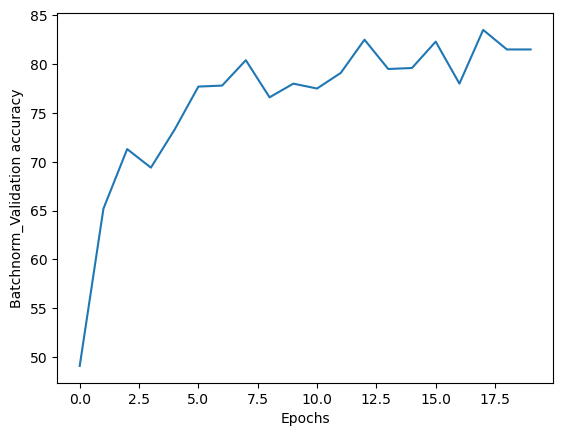

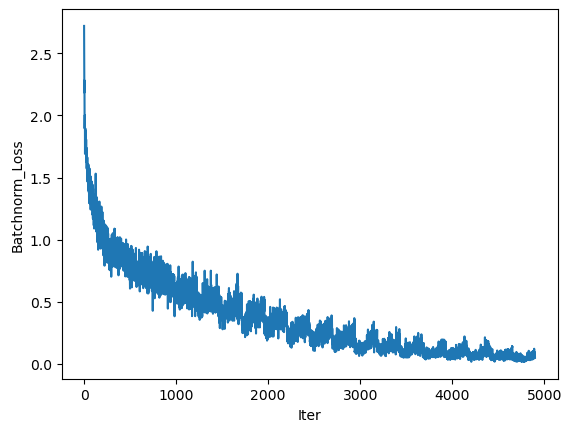

In [72]:
#Q2a
#base already ran above
#Batchnorm, Epoch 20
#Task: loss curve, accuracy
num_epochs=20
model_bn = ConvNet(input_size, hidden_size, num_classes,
                norm_layer=True).to(device)

model_train_test(model_bn, "Batchnorm")

Epoch [1/50], Step [100/245], Loss: 1.6417
Epoch [1/50], Step [200/245], Loss: 1.3341
Model 50 epochs_Validataion accuracy is: 49.8 %
Epoch [2/50], Step [100/245], Loss: 1.0786
Epoch [2/50], Step [200/245], Loss: 1.0099
Model 50 epochs_Validataion accuracy is: 62.9 %
Epoch [3/50], Step [100/245], Loss: 0.8863
Epoch [3/50], Step [200/245], Loss: 0.8713
Model 50 epochs_Validataion accuracy is: 69.3 %
Epoch [4/50], Step [100/245], Loss: 0.8043
Epoch [4/50], Step [200/245], Loss: 0.7183
Model 50 epochs_Validataion accuracy is: 70.7 %
Epoch [5/50], Step [100/245], Loss: 0.8409
Epoch [5/50], Step [200/245], Loss: 0.7166
Model 50 epochs_Validataion accuracy is: 73.6 %
Epoch [6/50], Step [100/245], Loss: 0.7533
Epoch [6/50], Step [200/245], Loss: 0.5499
Model 50 epochs_Validataion accuracy is: 74.0 %
Epoch [7/50], Step [100/245], Loss: 0.6345
Epoch [7/50], Step [200/245], Loss: 0.7196
Model 50 epochs_Validataion accuracy is: 73.9 %
Epoch [8/50], Step [100/245], Loss: 0.5751
Epoch [8/50], Step 

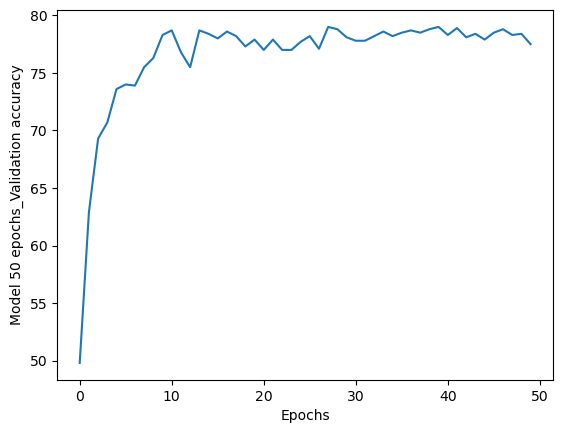

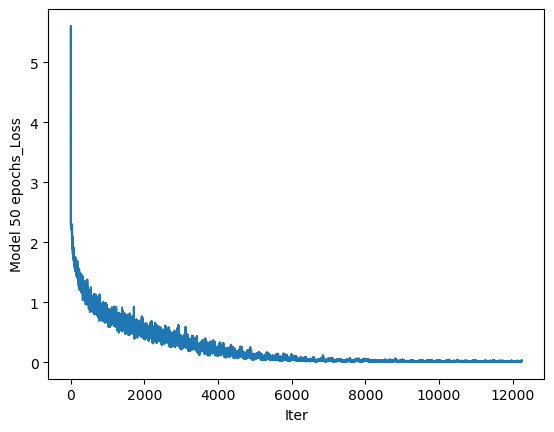

Epoch [1/50], Step [100/245], Loss: 0.2162
Epoch [1/50], Step [200/245], Loss: 0.1672
Model_bn 50 epochs_Validataion accuracy is: 75.3 %
Epoch [2/50], Step [100/245], Loss: 0.2676
Epoch [2/50], Step [200/245], Loss: 0.3240
Model_bn 50 epochs_Validataion accuracy is: 76.1 %
Epoch [3/50], Step [100/245], Loss: 0.1385
Epoch [3/50], Step [200/245], Loss: 0.3902
Model_bn 50 epochs_Validataion accuracy is: 73.6 %
Epoch [4/50], Step [100/245], Loss: 0.2295
Epoch [4/50], Step [200/245], Loss: 0.2199
Model_bn 50 epochs_Validataion accuracy is: 76.8 %
Epoch [5/50], Step [100/245], Loss: 0.1666
Epoch [5/50], Step [200/245], Loss: 0.2500
Model_bn 50 epochs_Validataion accuracy is: 75.9 %
Epoch [6/50], Step [100/245], Loss: 0.2296
Epoch [6/50], Step [200/245], Loss: 0.1273
Model_bn 50 epochs_Validataion accuracy is: 76.8 %
Epoch [7/50], Step [100/245], Loss: 0.3033
Epoch [7/50], Step [200/245], Loss: 0.2001
Model_bn 50 epochs_Validataion accuracy is: 76.5 %
Epoch [8/50], Step [100/245], Loss: 0.138

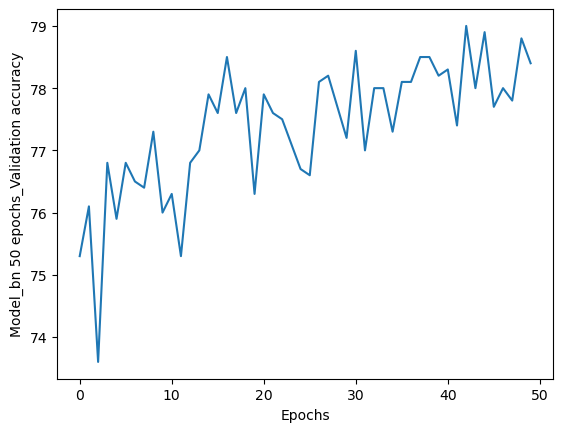

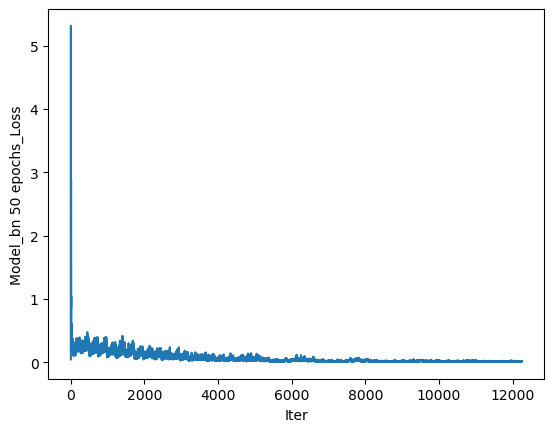

In [73]:
#Q2b
#base epoch 50
#batchnorm, epoch 50
#early stopping, loss curve, accuracy
num_epochs = 50
model_50 = ConvNet(input_size, hidden_size, num_classes, norm_layer=None).to(device)
model_bn_50 = ConvNet(input_size, hidden_size, num_classes, norm_layer=True).to(device)

model_train_test(model_50, "Model 50 epochs", earlystopping=True)
model_train_test(model_50, "Model_bn 50 epochs", earlystopping=True)

In [74]:
#Q3a
#data augmentation, epoch 20

def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)


def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.backends.mps.is_available():  # apple silicon
    device = torch.device("mps")
print('Using device: %s' % device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512, 512]
num_epochs = 20
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg = 0.001
num_training = 49000
num_validation = 1000
norm_layer = None
print(hidden_size)
data_augmentation = True

#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
#################################################################################
# TODO: Q3.a Chose the right data augmentation transforms with the right        #
# hyper-parameters and put them in the data_aug_transforms variable             #
#################################################################################
data_aug_transforms = []
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
if data_augmentation == True:
    data_aug_transforms = [transforms.RandomRotation((-180, 180)),
                           transforms.RandomHorizontalFlip(p=0.5),
                           transforms.RandomVerticalFlip(p=0.5)]
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                                         transforms.Normalize(
                                                             (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                                         ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(
                                         (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                             train=True,
                                             transform=norm_transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                            train=False,
                                            transform=test_transform
                                            )
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


Using device: mps
[128, 512, 512, 512, 512, 512]
Files already downloaded and verified


Epoch [1/20], Step [100/245], Loss: 1.9471
Epoch [1/20], Step [200/245], Loss: 1.8970
Model with data augmentation_Validataion accuracy is: 35.8 %
Epoch [2/20], Step [100/245], Loss: 1.7268
Epoch [2/20], Step [200/245], Loss: 1.6496
Model with data augmentation_Validataion accuracy is: 40.1 %
Epoch [3/20], Step [100/245], Loss: 1.6719
Epoch [3/20], Step [200/245], Loss: 1.6771
Model with data augmentation_Validataion accuracy is: 46.4 %
Epoch [4/20], Step [100/245], Loss: 1.4870
Epoch [4/20], Step [200/245], Loss: 1.4541
Model with data augmentation_Validataion accuracy is: 49.9 %
Epoch [5/20], Step [100/245], Loss: 1.4489
Epoch [5/20], Step [200/245], Loss: 1.4221
Model with data augmentation_Validataion accuracy is: 51.8 %
Epoch [6/20], Step [100/245], Loss: 1.4028
Epoch [6/20], Step [200/245], Loss: 1.3102
Model with data augmentation_Validataion accuracy is: 52.7 %
Epoch [7/20], Step [100/245], Loss: 1.2654
Epoch [7/20], Step [200/245], Loss: 1.2752
Model with data augmentation_Val

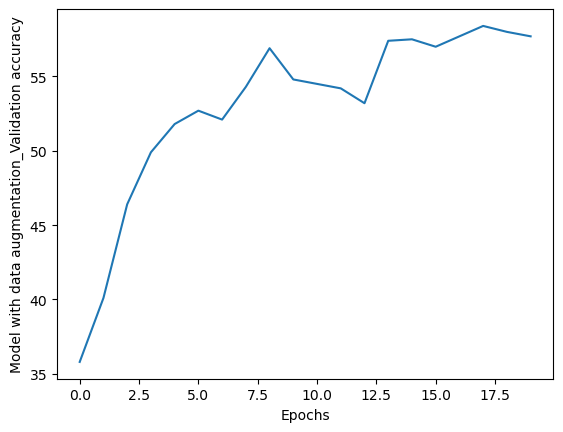

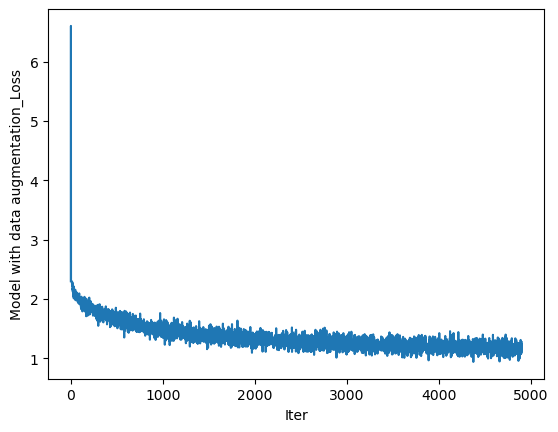

In [75]:
model_aug = ConvNet(input_size, hidden_size, num_classes, norm_layer=None).to(device)
model_train_test(model_aug, 'Model with data augmentation')

Using device: mps
[128, 512, 512, 512, 512, 512]
Files already downloaded and verified
Epoch [1/20], Step [100/245], Loss: 1.7005
Epoch [1/20], Step [200/245], Loss: 1.4259
Model with Dropout value 0.2_Validataion accuracy is: 53.2 %
Epoch [2/20], Step [100/245], Loss: 1.2198
Epoch [2/20], Step [200/245], Loss: 1.1934
Model with Dropout value 0.2_Validataion accuracy is: 60.4 %
Epoch [3/20], Step [100/245], Loss: 1.0320
Epoch [3/20], Step [200/245], Loss: 0.9148
Model with Dropout value 0.2_Validataion accuracy is: 67.5 %
Epoch [4/20], Step [100/245], Loss: 0.8059
Epoch [4/20], Step [200/245], Loss: 0.8103
Model with Dropout value 0.2_Validataion accuracy is: 71.2 %
Epoch [5/20], Step [100/245], Loss: 0.6777
Epoch [5/20], Step [200/245], Loss: 0.6990
Model with Dropout value 0.2_Validataion accuracy is: 74.5 %
Epoch [6/20], Step [100/245], Loss: 0.6291
Epoch [6/20], Step [200/245], Loss: 0.6885
Model with Dropout value 0.2_Validataion accuracy is: 74.9 %
Epoch [7/20], Step [100/245], L

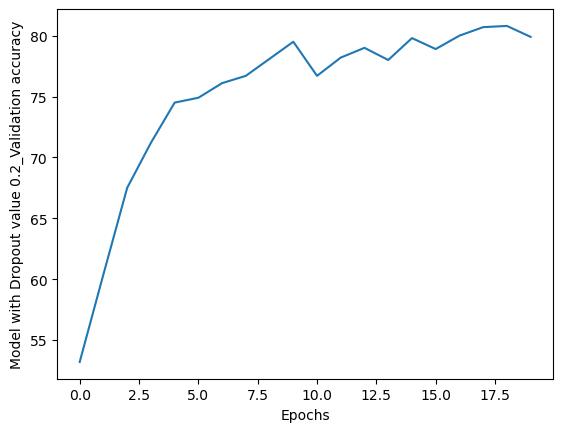

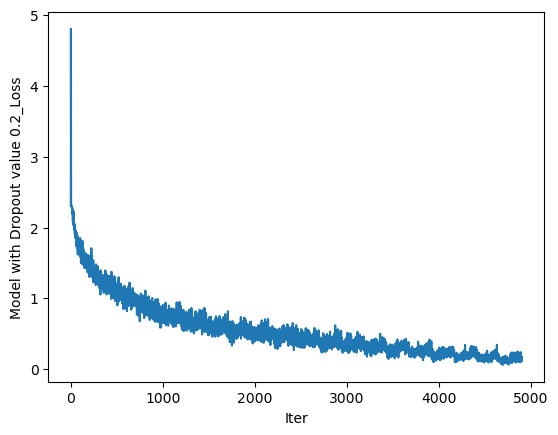

Epoch [1/20], Step [100/245], Loss: 1.6306
Epoch [1/20], Step [200/245], Loss: 1.4190
Model with Dropout value 0.5_Validataion accuracy is: 55.6 %
Epoch [2/20], Step [100/245], Loss: 1.2571
Epoch [2/20], Step [200/245], Loss: 1.3783
Model with Dropout value 0.5_Validataion accuracy is: 60.4 %
Epoch [3/20], Step [100/245], Loss: 0.8704
Epoch [3/20], Step [200/245], Loss: 1.0141
Model with Dropout value 0.5_Validataion accuracy is: 70.7 %
Epoch [4/20], Step [100/245], Loss: 0.9473
Epoch [4/20], Step [200/245], Loss: 0.7794
Model with Dropout value 0.5_Validataion accuracy is: 71.9 %
Epoch [5/20], Step [100/245], Loss: 0.6675
Epoch [5/20], Step [200/245], Loss: 0.6850
Model with Dropout value 0.5_Validataion accuracy is: 74.0 %
Epoch [6/20], Step [100/245], Loss: 0.5928
Epoch [6/20], Step [200/245], Loss: 0.5568
Model with Dropout value 0.5_Validataion accuracy is: 75.9 %
Epoch [7/20], Step [100/245], Loss: 0.6661
Epoch [7/20], Step [200/245], Loss: 0.4996
Model with Dropout value 0.5_Val

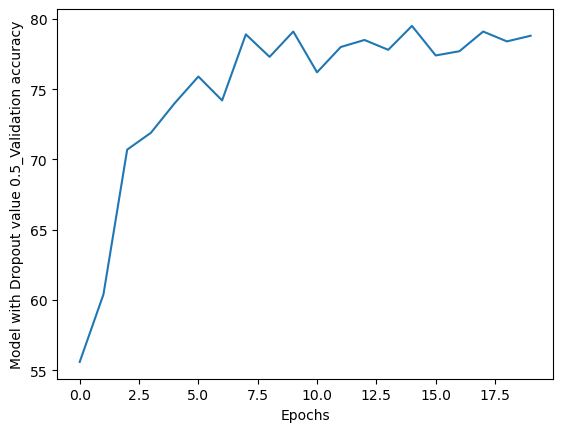

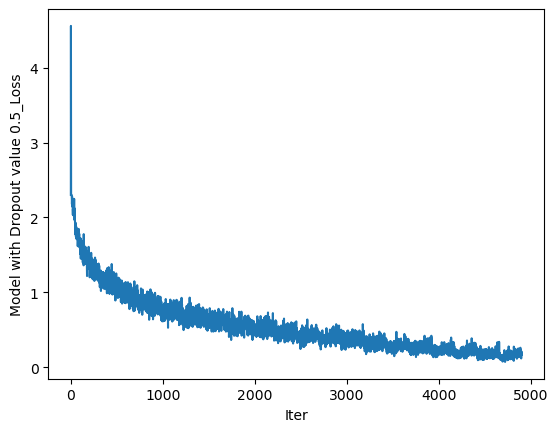

Epoch [1/20], Step [100/245], Loss: 1.6116
Epoch [1/20], Step [200/245], Loss: 1.4385
Model with Dropout value 0.8_Validataion accuracy is: 52.8 %
Epoch [2/20], Step [100/245], Loss: 1.2707
Epoch [2/20], Step [200/245], Loss: 0.9972
Model with Dropout value 0.8_Validataion accuracy is: 60.0 %
Epoch [3/20], Step [100/245], Loss: 0.8654
Epoch [3/20], Step [200/245], Loss: 1.0271
Model with Dropout value 0.8_Validataion accuracy is: 67.9 %
Epoch [4/20], Step [100/245], Loss: 0.9235
Epoch [4/20], Step [200/245], Loss: 0.8053
Model with Dropout value 0.8_Validataion accuracy is: 70.3 %
Epoch [5/20], Step [100/245], Loss: 0.7853
Epoch [5/20], Step [200/245], Loss: 0.6482
Model with Dropout value 0.8_Validataion accuracy is: 72.0 %
Epoch [6/20], Step [100/245], Loss: 0.7627
Epoch [6/20], Step [200/245], Loss: 0.5990
Model with Dropout value 0.8_Validataion accuracy is: 73.4 %
Epoch [7/20], Step [100/245], Loss: 0.6147
Epoch [7/20], Step [200/245], Loss: 0.6883
Model with Dropout value 0.8_Val

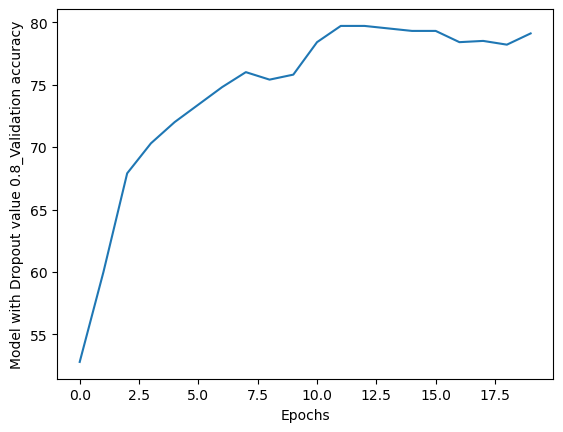

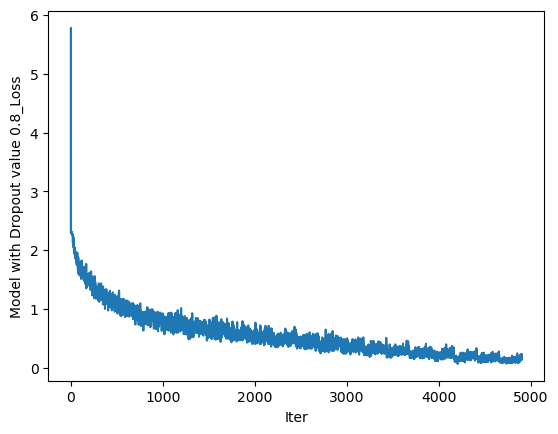

In [76]:
#Q3b
#different dropout values on base model

def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)


def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.backends.mps.is_available():  # apple silicon
    device = torch.device("mps")
print('Using device: %s' % device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512, 512]
num_epochs = 20
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg = 0.001
num_training = 49000
num_validation = 1000
norm_layer = None
print(hidden_size)
data_augmentation = False

#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
#################################################################################
# TODO: Q3.a Chose the right data augmentation transforms with the right        #
# hyper-parameters and put them in the data_aug_transforms variable             #
#################################################################################
data_aug_transforms = []
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
if data_augmentation == True:
    data_aug_transforms = [transforms.RandomRotation((-180, 180)),
                           transforms.RandomHorizontalFlip(p=0.5),
                           transforms.RandomVerticalFlip(p=0.5)]
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                                         transforms.Normalize(
                                                             (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                                         ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(
                                         (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                             train=True,
                                             transform=norm_transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                            train=False,
                                            transform=test_transform
                                            )
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


model_dropout_02 = ConvNet(input_size, hidden_size, num_classes, norm_layer=None, dropout_val=0.2).to(device)
model_dropout_05 = ConvNet(input_size, hidden_size, num_classes, norm_layer=None, dropout_val=0.5).to(device)
model_dropout_08 = ConvNet(input_size, hidden_size, num_classes, norm_layer=None, dropout_val=0.8).to(device)
model_train_test(model_dropout_02, 'Model with Dropout value 0.2')
model_train_test(model_dropout_05, 'Model with Dropout value 0.5')
model_train_test(model_dropout_08, 'Model with Dropout value 0.8')

### Question 4: Use pretrained networks (10 points)

It has become standard practice in computer vision tasks related to images to use a convolutional network pre-trained as the backbone feature extraction network and train new layers on top for the target task. In this question, we will implement such a model. We will use the `VGG_11_bn` network from the `torchvision.models` library as our backbone network. This model has been trained on ImageNet, achieving a top-5 error rate of 10.19%. It consists of 8 convolutional layers followed by adaptive average pooling and fully-connected layers to perform the classification. We will get rid of the average pooling and fully-connected layers from the `VGG_11_bn` model and attach our own fully connected layers to perform the CIFAR-10 classification.

a) Instantiate a pretrained version of the `VGG_11_bn` model with ImageNet pre-trained weights. Add two fully connected layers on top, with Batch Norm and ReLU layers in between them, to build the CIFAR-10 10-class classifier. Note that you will need to set the correct mean and variance in the data-loader, to match the mean and variance the data was normalized with when the `VGG_11_bn` was trained. Train only the newly added layers while disabling gradients for the rest of the network. Each parameter in PyTorch has a required grad flag, which can be turned off to disable gradient computation for it. Get familiar with this gradient control mechanism in PyTorch and train the above model. As a reference point, you will see validation accuracies in the range (61-65%) if implemented correctly. (6 points)

b) We can see that while the ImageNet features are useful, just learning the new layers does not yield better performance than training our own network from scratch. This is due to the domain-shift between the ImageNet dataset (224x224 resolution images) and the CIFAR-10 dataset (32x32 images). To improve the performance we can fine-tune the whole network on the CIFAR-10 dataset, starting from the ImageNet initialization. To do this, enable gradient computation to the rest of the network, and update all the model parameters. Additionally train a baseline model where the same entire network is trained from scratch, without loading the ImageNet weights. Compare the two models' training curves, validation, and testing performance in the report. (4 points)

#### Wirte your report for Q4 in this cell.

The model with pretrained and fine tuned VGG net has the highest accuracy in validation and test data. The fine tuning process can help the pretrained model to learn with our new data, starting from their optimized weights. This makes the learning process much faster and the result more powerful. The second best performance is achieved by the model with pretrained VGG net and without using weights, so learning from scratch. Using vgg net without fine-tuning and learning parameters only for fully connected layers is less adaptive to our new train data, since the net is already optimized to the input data of VGG net. On the other hand, the model from scratch has to be trained without such base, therefore, it is more adaptive and also better optimized to the CIFAR-10 input data.


In [28]:
def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.backends.mps.is_available(): #apple silicon
    device = torch.device("mps")
print('Using device: %s'%device)


#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 32 * 32 * 3
layer_config= [512, 256]
num_classes = 10
num_epochs = 30
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.99
reg=0#0.001
num_training= 49000
num_validation =1000
fine_tune = True
pretrained=True

data_aug_transforms = [transforms.RandomHorizontalFlip(p=0.5)]#, transforms.RandomGrayscale(p=0.05)]
#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
# Q1,
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=False)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=norm_transform
                                          )
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

Using device: mps


In [29]:
class VggModel(nn.Module):
    def __init__(self, n_class, fine_tune, pretrained=True):
        super(VggModel, self).__init__()
        #################################################################################
        # TODO: Build the classification network described in Q4 using the              #
        # models.vgg11_bn network from torchvision model zoo as the feature extraction  #
        # layers and two linear layers on top for classification. You can load the      #
        # pretrained ImageNet weights based on the pretrained flag. You can enable and  #
        # disable training the feature extraction layers based on the fine_tune flag.   #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        model = torchvision.models.vgg11_bn(pretrained=pretrained).features
        feature_extraction = not fine_tune
        set_parameter_requires_grad(model, feature_extraction)
        self.model = nn.Sequential(model)
        self.fc = nn.Sequential(
                                #nn.BatchNorm1d(layer_config[0]),
                                #nn.ReLU(),
                                nn.Linear(layer_config[0], layer_config[1]),
                                nn.BatchNorm1d(layer_config[1]),
                                nn.ReLU(),
                                nn.Linear(layer_config[1], n_class),
                                )

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        x = self.model(x)
        x = nn.Flatten(1, -1)(x)
        out = self.fc(x)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

# Initialize the model for this run
model= VggModel(num_classes, fine_tune=False, pretrained=pretrained)

/Users/kidukkang/opt/anaconda3/envs/hws22/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/kidukkang/opt/anaconda3/envs/hws22/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [30]:
# Print the model we just instantiated
#print(model)

#################################################################################
# TODO: Only select the required parameters to pass to the optimizer. No need to#
# update parameters which should be held fixed (conv layers).                   #
#################################################################################
print("Params to learn:")
if fine_tune:
    params_to_update = []
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    for name, param in model.named_parameters():
        if param.requires_grad==True:
            params_to_update.append(param)
            print("\t", name)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
else:
    params_to_update = model.parameters()
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)


model.to(device)

Params to learn:
	 fc.0.weight
	 fc.0.bias
	 fc.1.weight
	 fc.1.bias
	 fc.3.weight
	 fc.3.bias


VggModel(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace=True)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [31]:

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params_to_update, lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
best_acc=0
vgg_acc=[]
vgg_loss=[]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        vgg_loss.append(loss.cpu().data.numpy())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        #################################################################################
        # TODO: Q2.b Use the early stopping mechanism from previous questions to save   #
        # the model which has acheieved the best validation accuracy so-far.            #
        #################################################################################
        best_model = None
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        val_acc = correct/total*100
        vgg_acc.append(val_acc)
        if val_acc > best_acc:
            best_acc = val_acc
            best_model = model
            torch.save(best_model.state_dict(),'./best_vgg.ckpt')
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


        print('Validataion accuracy is: {} %'.format(100 * correct / total))

Epoch [1/30], Step [100/245], Loss: 1.2174
Epoch [1/30], Step [200/245], Loss: 1.0192
Validataion accuracy is: 60.0 %
Epoch [2/30], Step [100/245], Loss: 0.8527
Epoch [2/30], Step [200/245], Loss: 1.0305
Validataion accuracy is: 62.5 %
Epoch [3/30], Step [100/245], Loss: 1.0549
Epoch [3/30], Step [200/245], Loss: 1.0016
Validataion accuracy is: 60.9 %
Epoch [4/30], Step [100/245], Loss: 0.8722
Epoch [4/30], Step [200/245], Loss: 0.9754
Validataion accuracy is: 62.2 %
Epoch [5/30], Step [100/245], Loss: 0.9972
Epoch [5/30], Step [200/245], Loss: 0.8110
Validataion accuracy is: 64.0 %
Epoch [6/30], Step [100/245], Loss: 0.8117
Epoch [6/30], Step [200/245], Loss: 1.0024
Validataion accuracy is: 62.3 %
Epoch [7/30], Step [100/245], Loss: 0.9963
Epoch [7/30], Step [200/245], Loss: 0.8622
Validataion accuracy is: 62.3 %
Epoch [8/30], Step [100/245], Loss: 0.8916
Epoch [8/30], Step [200/245], Loss: 0.8694
Validataion accuracy is: 63.2 %
Epoch [9/30], Step [100/245], Loss: 0.7594
Epoch [9/30],

Accuracy of the network on the 1000 test images: 64.3 %


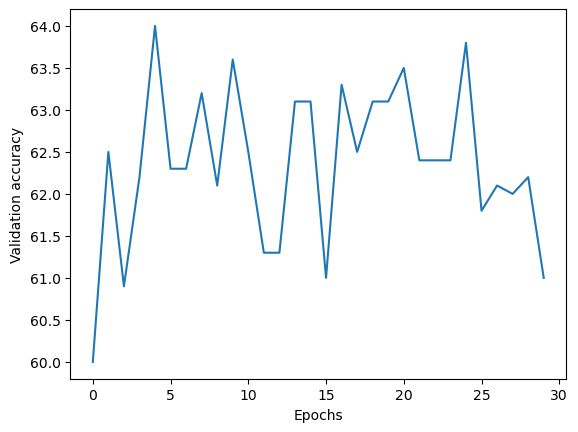

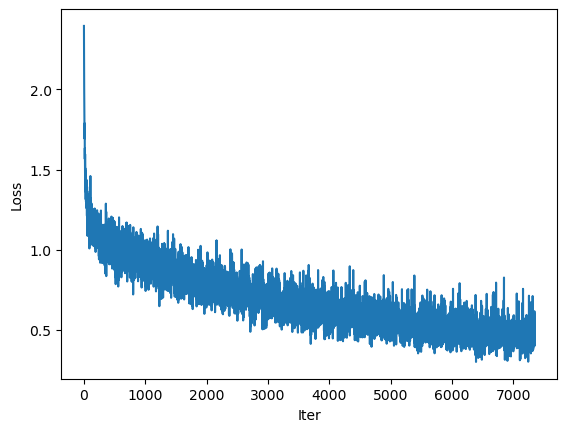

In [32]:
#################################################################################
# TODO: Use the early stopping mechanism from previous question to load the     #
# weights from the best model so far and perform testing with this model.       #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
from sklearn.semi_supervised import LabelPropagation


model.load_state_dict(torch.load('./best_vgg.ckpt'))
model.eval()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

# Save the model checkpoint
#torch.save(model.state_dict(), 'model.ckpt')

plt.plot(vgg_acc, label = 'Valuation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.show()

plt.plot(vgg_loss, label='Loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

In [36]:
#Q4b
#scratch
scratch_model = VggModel(num_classes, fine_tune, pretrained=False)
scratch_model = scratch_model.to(device)

print("Params to learn:")
if fine_tune:
    params_to_update = []
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    for name, param in scratch_model.named_parameters():
        if param.requires_grad==True:
            params_to_update.append(param)
            print("\t",name)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
else:
    params_to_update = scratch_model.parameters()
    for name,param in scratch_model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)


Params to learn:
	 model.0.0.weight
	 model.0.0.bias
	 model.0.1.weight
	 model.0.1.bias
	 model.0.4.weight
	 model.0.4.bias
	 model.0.5.weight
	 model.0.5.bias
	 model.0.8.weight
	 model.0.8.bias
	 model.0.9.weight
	 model.0.9.bias
	 model.0.11.weight
	 model.0.11.bias
	 model.0.12.weight
	 model.0.12.bias
	 model.0.15.weight
	 model.0.15.bias
	 model.0.16.weight
	 model.0.16.bias
	 model.0.18.weight
	 model.0.18.bias
	 model.0.19.weight
	 model.0.19.bias
	 model.0.22.weight
	 model.0.22.bias
	 model.0.23.weight
	 model.0.23.bias
	 model.0.25.weight
	 model.0.25.bias
	 model.0.26.weight
	 model.0.26.bias
	 fc.0.weight
	 fc.0.bias
	 fc.1.weight
	 fc.1.bias
	 fc.3.weight
	 fc.3.bias


In [37]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    params_to_update, lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
best_acc = 0
scratch_acc = []
scratch_loss = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = scratch_model(images)
        loss = criterion(outputs, labels)
        scratch_loss.append(loss.cpu().data.numpy())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            outputs = scratch_model(images)
            _, predicted = torch.max(outputs.data, 1)
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        #################################################################################
        # TODO: Q2.b Use the early stopping mechanism from previous questions to save   #
        # the model which has acheieved the best validation accuracy so-far.            #
        #################################################################################
        best_model = None
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        s_val_acc = correct/total*100
        scratch_acc.append(s_val_acc)
        if s_val_acc > best_acc:
            best_acc = s_val_acc
            best_model = scratch_model
            torch.save(best_model.state_dict(), './best_scratch.ckpt')
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        print('Scratch model validation accuracy is: {} %'.format(100 * correct / total))


Epoch [1/30], Step [100/245], Loss: 1.0333
Epoch [1/30], Step [200/245], Loss: 0.8462
Scratch model validation accuracy is: 69.6 %
Epoch [2/30], Step [100/245], Loss: 0.7969
Epoch [2/30], Step [200/245], Loss: 0.7684
Scratch model validation accuracy is: 77.4 %
Epoch [3/30], Step [100/245], Loss: 0.5800
Epoch [3/30], Step [200/245], Loss: 0.5267
Scratch model validation accuracy is: 80.4 %
Epoch [4/30], Step [100/245], Loss: 0.4436
Epoch [4/30], Step [200/245], Loss: 0.4961
Scratch model validation accuracy is: 80.7 %
Epoch [5/30], Step [100/245], Loss: 0.4207
Epoch [5/30], Step [200/245], Loss: 0.4883
Scratch model validation accuracy is: 83.2 %
Epoch [6/30], Step [100/245], Loss: 0.4153
Epoch [6/30], Step [200/245], Loss: 0.4166
Scratch model validation accuracy is: 84.9 %
Epoch [7/30], Step [100/245], Loss: 0.1862
Epoch [7/30], Step [200/245], Loss: 0.4089
Scratch model validation accuracy is: 84.1 %
Epoch [8/30], Step [100/245], Loss: 0.2962
Epoch [8/30], Step [200/245], Loss: 0.22

Accuracy of the network on the 1000 test images: 84.5 %


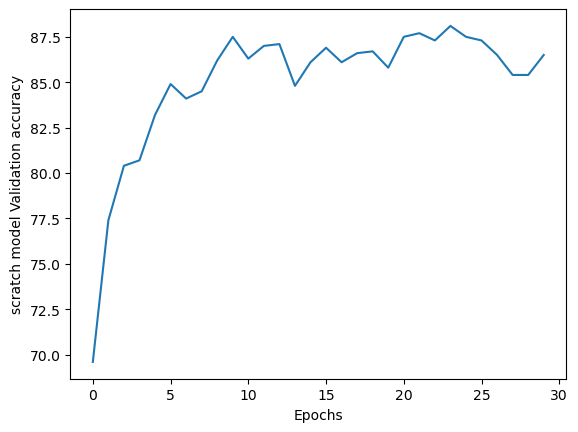

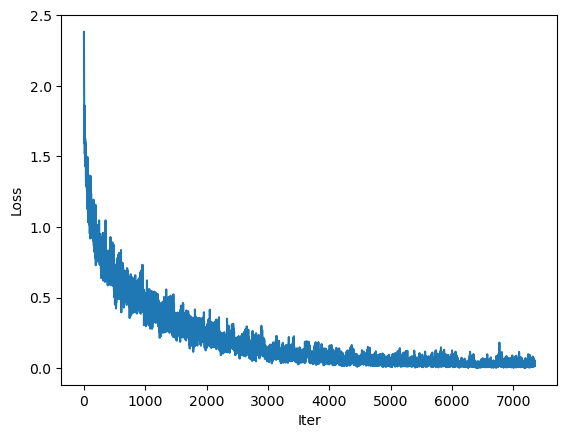

In [38]:
#################################################################################
# TODO: Use the early stopping mechanism from previous question to load the     #
# weights from the best model so far and perform testing with this model.       #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
from sklearn.semi_supervised import LabelPropagation


scratch_model.load_state_dict(torch.load('./best_scratch.ckpt'))
scratch_model.eval()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = scratch_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

# Save the model checkpoint
#torch.save(model.state_dict(), 'model.ckpt')

plt.plot(scratch_acc, label = 'Valuation accuracy')
plt.xlabel('Epochs')
plt.ylabel('scratch model Validation accuracy')
plt.show()

plt.plot(scratch_loss, label='Loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

In [39]:
#Q4b
#finetune
finetune_model = VggModel(num_classes, fine_tune, pretrained=True)
finetune_model = finetune_model.to(device)

print("Params to learn:")
if fine_tune:
    params_to_update = []
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    for name, param in finetune_model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
else:
    params_to_update = finetune_model.parameters()
    for name, param in finetune_model.named_parameters():
        if param.requires_grad == True:
            print("\t", name)


Params to learn:
	 model.0.0.weight
	 model.0.0.bias
	 model.0.1.weight
	 model.0.1.bias
	 model.0.4.weight
	 model.0.4.bias
	 model.0.5.weight
	 model.0.5.bias
	 model.0.8.weight
	 model.0.8.bias
	 model.0.9.weight
	 model.0.9.bias
	 model.0.11.weight
	 model.0.11.bias
	 model.0.12.weight
	 model.0.12.bias
	 model.0.15.weight
	 model.0.15.bias
	 model.0.16.weight
	 model.0.16.bias
	 model.0.18.weight
	 model.0.18.bias
	 model.0.19.weight
	 model.0.19.bias
	 model.0.22.weight
	 model.0.22.bias
	 model.0.23.weight
	 model.0.23.bias
	 model.0.25.weight
	 model.0.25.bias
	 model.0.26.weight
	 model.0.26.bias
	 fc.0.weight
	 fc.0.bias
	 fc.1.weight
	 fc.1.bias
	 fc.3.weight
	 fc.3.bias


In [40]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    params_to_update, lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
best_acc = 0
finetune_acc = []
finetune_loss = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = finetune_model(images)
        loss = criterion(outputs, labels)
        finetune_loss.append(loss.cpu().data.numpy())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            outputs = finetune_model(images)
            _, predicted = torch.max(outputs.data, 1)
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        #################################################################################
        # TODO: Q2.b Use the early stopping mechanism from previous questions to save   #
        # the model which has acheieved the best validation accuracy so-far.            #
        #################################################################################
        best_model = None
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        f_val_acc = correct/total*100
        finetune_acc.append(f_val_acc)
        if f_val_acc > best_acc:
            best_acc = f_val_acc
            best_model = finetune_model
            torch.save(best_model.state_dict(), './best_finetune.ckpt')
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        print('Finetune model validation accuracy is: {} %'.format(100 * correct / total))


Epoch [1/30], Step [100/245], Loss: 0.5337
Epoch [1/30], Step [200/245], Loss: 0.4800
Finetune model validation accuracy is: 85.1 %
Epoch [2/30], Step [100/245], Loss: 0.3282
Epoch [2/30], Step [200/245], Loss: 0.3783
Finetune model validation accuracy is: 86.6 %
Epoch [3/30], Step [100/245], Loss: 0.3499
Epoch [3/30], Step [200/245], Loss: 0.3948
Finetune model validation accuracy is: 87.5 %
Epoch [4/30], Step [100/245], Loss: 0.1963
Epoch [4/30], Step [200/245], Loss: 0.3246
Finetune model validation accuracy is: 86.6 %
Epoch [5/30], Step [100/245], Loss: 0.1146
Epoch [5/30], Step [200/245], Loss: 0.1866
Finetune model validation accuracy is: 87.7 %
Epoch [6/30], Step [100/245], Loss: 0.0960
Epoch [6/30], Step [200/245], Loss: 0.1888
Finetune model validation accuracy is: 87.4 %
Epoch [7/30], Step [100/245], Loss: 0.1138
Epoch [7/30], Step [200/245], Loss: 0.1161
Finetune model validation accuracy is: 88.1 %
Epoch [8/30], Step [100/245], Loss: 0.0743
Epoch [8/30], Step [200/245], Los

Accuracy of the network on the 1000 test images: 89.5 %


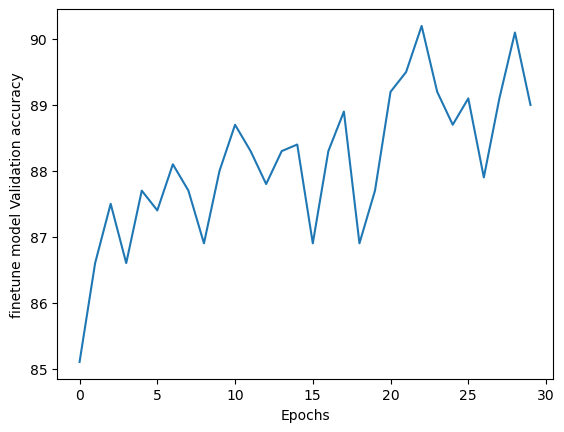

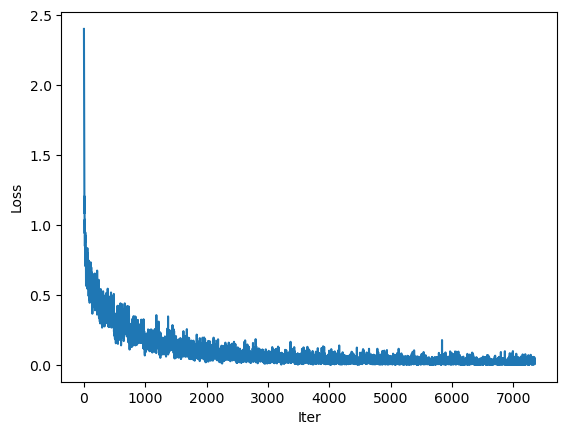

In [41]:
#################################################################################
# TODO: Use the early stopping mechanism from previous question to load the     #
# weights from the best model so far and perform testing with this model.       #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
from sklearn.semi_supervised import LabelPropagation


finetune_model.load_state_dict(torch.load('./best_finetune.ckpt'))
finetune_model.eval()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = finetune_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

# Save the model checkpoint
#torch.save(model.state_dict(), 'model.ckpt')

plt.plot(finetune_acc, label = 'Valuation accuracy')
plt.xlabel('Epochs')
plt.ylabel('finetune model Validation accuracy')
plt.show()

plt.plot(finetune_loss, label='Loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()